In [29]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import integrate
from scipy import optimize
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

[199.21811161   3.42437058 199.89616335]


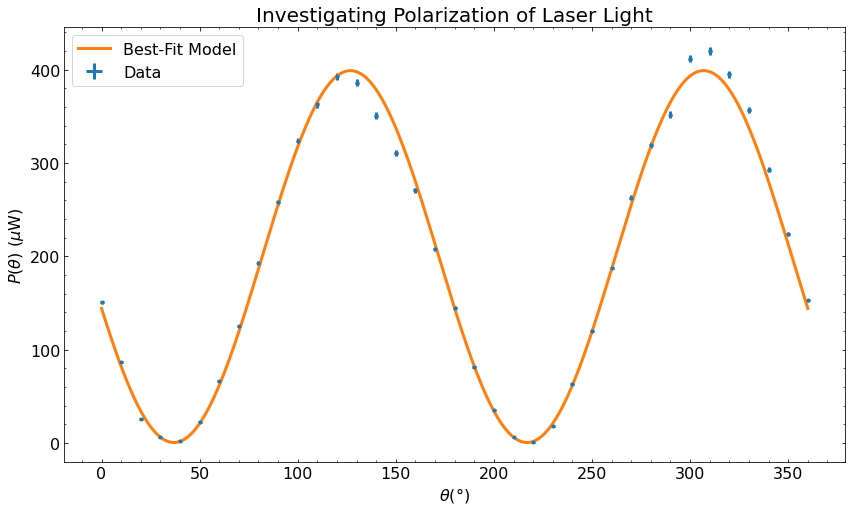

In [45]:
data = np.genfromtxt('/Users/chris/Desktop/Polarization_Data.csv',delimiter=',')
dat = data.T
x = dat[0]
xerr = dat[1]
y = dat[2]
yerr = dat[3]

#plot data
plt.figure(figsize = (14,8))
plt.errorbar(x,y,xerr=xerr,yerr=yerr,linestyle='',marker='.',label='Data')
# define curve
def curve(t,A,phi,h):
    return A*np.sin((2*t*(np.pi/180))+phi)+h
# make fit
bestpar_A, covariance = optimize.curve_fit(curve,x,y,sigma=yerr)
bestpar_uncertainty_A = np.sqrt(np.diag(covariance))
# plot fit
x_curve = np.linspace(0,360,1000)
y_curve = curve(x_curve,bestpar_A[0],bestpar_A[1],bestpar_A[2])

plt.plot(x_curve,y_curve,label="Best-Fit Model")

plt.xlabel(r'$\theta (\degree)$')
plt.ylabel(r'$P(\theta)$ ($\mu$W)')
plt.title('Investigating Polarization of Laser Light', fontsize = 20)
plt.legend()
print(bestpar_A)
plt.savefig('/Users/chris/Desktop/Polarization_Plot.jpg',dpi=500)

In [43]:
amp = bestpar_A[0]
Aerr = bestpar_uncertainty_A[0]
h = bestpar_A[2]
herr = bestpar_uncertainty_A[2]
Imax = (bestpar_A[0]+bestpar_A[2])
Imin = -(bestpar_A[0]-bestpar_A[2])
Ierr = np.sqrt(herr**2 + Aerr**2)
rho = (Imax - Imin)/(Imax + Imin)
print(amp,Aerr)
print(h,herr)
print(rho)
print(Imax)
print(Imin)
print(Ierr)

199.21811160641826 2.8538135445406603
199.89616335004672 2.8132841185759343
0.9966079802019958
399.114274956465
0.6780517436284583
4.007345665005117


[ nan  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13. ]


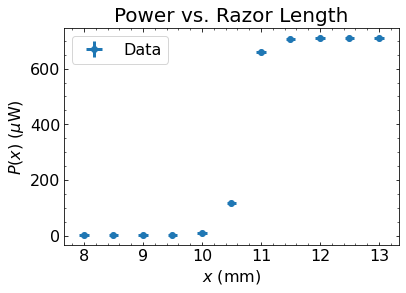

In [47]:
data = np.genfromtxt('/Users/chris/Desktop/Beam_Diameter.csv',delimiter=',')
dat = data.T
x = dat[0]
y = dat[1]
yerr = dat[2]
plt.errorbar(x,y,xerr=0.25/np.sqrt(10),yerr=yerr,linestyle='',marker='o',label='Data')
plt.xlabel(r'$x$ (mm)')
plt.ylabel(r'$P(x)$ ($\mu$W)')
plt.title('Power vs. Razor Length', fontsize = 20)
plt.legend()
xdat = np.array(x)
print(x)

In [ ]:
xdata = np.array(xlist)
ydata = np.array(ylist)

parameter_initial = np.array([2.5,2.5]) # k, h


def func(x,k,h):
    fn = lambda t : t**(a-1)*np.exp(-t)
    den = integrate.quad(fn, 0.0, b/c)[0]
    num = np.asarray([integrate.quad(fn, _x/c, b/c)[0] for _x in x])
    return num/den

parameter_optimal, cov = scipy.optimize.curve_fit(func, xdata, ydata,p0=parameter_initial) 
print("paramater =", parameter_optimal)
y = func(xdata, *parameter_optimal)
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, y, '-')
plt.show()